In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3RhbmNyZWRlaC9EZXNrdG9wL2xlc2NpZW5jaWVsL3Bvc3RzLzIwMjQtMjctMTItZGlzdHJpYnV0aW9uLWRpdmVyZ2VuY2U='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1733251361.0, "/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.

/var/folders/cn/f38f6tmd3578_byfz3k483000000gn/T/ipykernel_97659/393629500.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



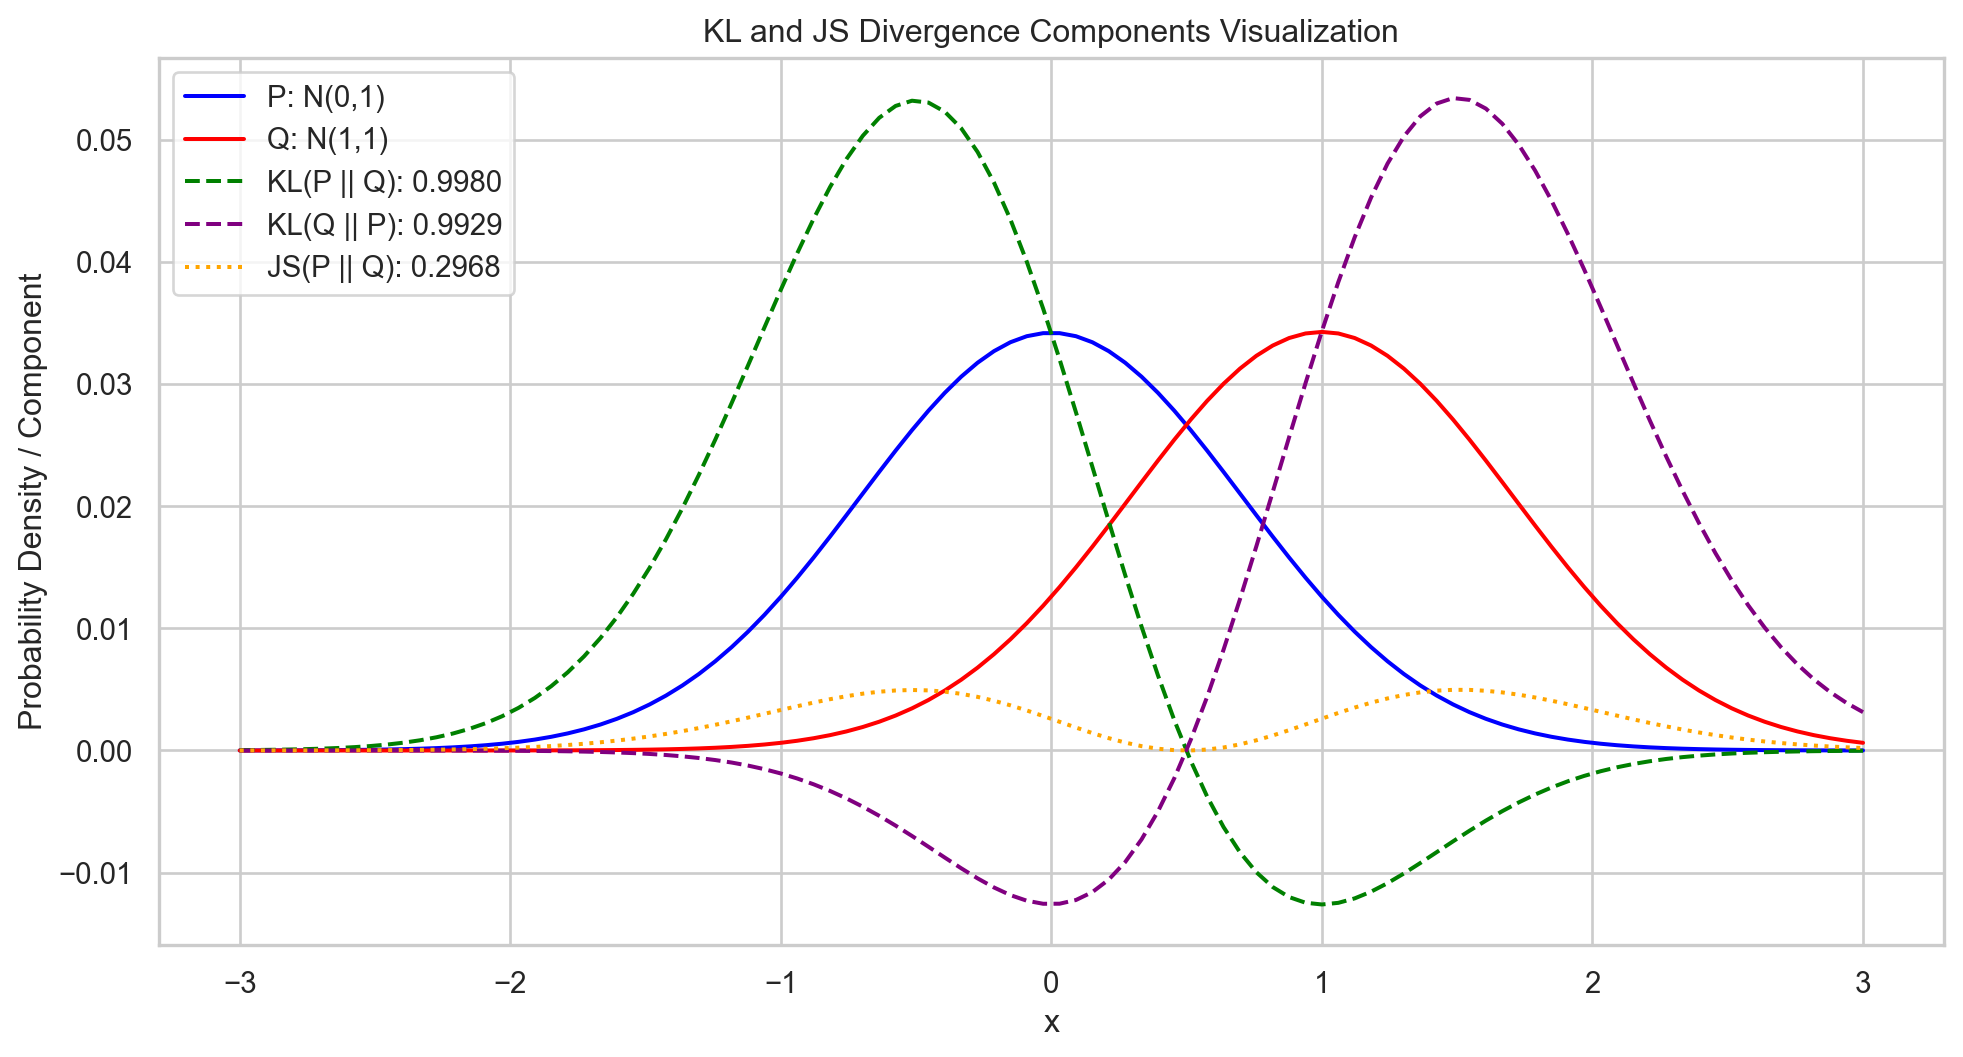

In [2]:
#| layout-ncol: 1
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import linprog

def kl_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def js_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    kl_mq = kl_divergence(m, q)
    kl_mp = kl_divergence(m, p)
    return 0.5 * (kl_mq + kl_mp)

# Define two distributions
x = np.linspace(-3, 3, 100)
p = np.exp(-x**2) / np.sqrt(2 * np.pi)  # Normal distribution, mean=0, std=1
q = np.exp(-(x - 1)**2) / np.sqrt(2 * np.pi)  # Normal distribution, mean=1, std=1

# Normalize distributions
p /= np.sum(p)
q /= np.sum(q)

# Compute divergences and their components
kl_pq = kl_divergence(p, q)
kl_qp = kl_divergence(q, p)
js_pq = js_divergence(p, q)
m = 0.5 * (p + q)
kl_mq = kl_divergence(m, q)
kl_mp = kl_divergence(m, p)

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Original distributions P and Q
plt.plot(x, p, label="P: N(0,1)", color="blue")
plt.plot(x, q, label="Q: N(1,1)", color="red")

# KL(P || Q) component: P * log(P / Q)
kl_pq_component = np.where(p != 0, p * np.log(p / q), 0)
plt.plot(x, kl_pq_component, label=f"KL(P || Q): {kl_pq:.4f}", color="green", linestyle="--")

# KL(Q || P) component: Q * log(Q / P)
kl_qp_component = np.where(q != 0, q * np.log(q / p), 0)
plt.plot(x, kl_qp_component, label=f"KL(Q || P): {kl_qp:.4f}", color="purple", linestyle="--")

# JS(P || Q) components: 0.5 * (P * log(P / M) + Q * log(Q / M))
js_pq_components = 0.5 * (np.where(p != 0, p * np.log(p / m), 0) +
                         np.where(q != 0, q * np.log(q / m), 0))
plt.plot(x, js_pq_components, label=f"JS(P || Q): {js_pq:.4f}", color="orange", linestyle=":")

plt.title("KL and JS Divergence Components Visualization")
plt.xlabel("x")
plt.ylabel("Probability Density / Component")
plt.legend()
plt.show()

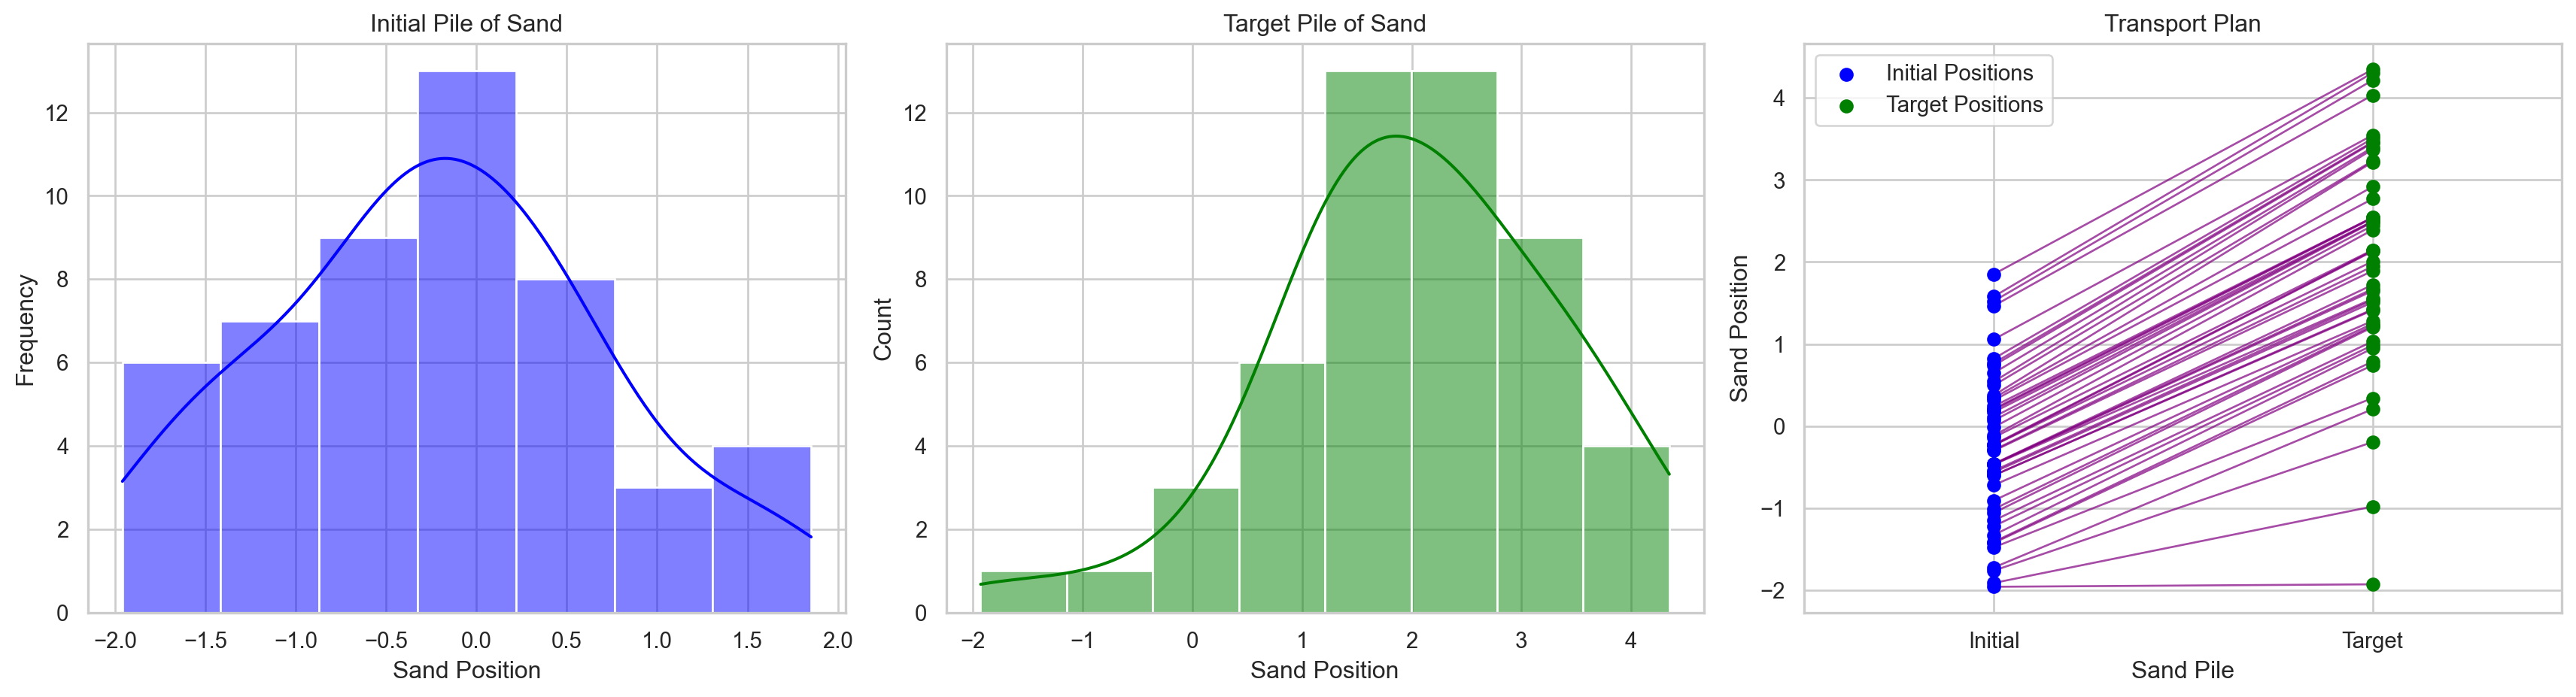

In [3]:
#| layout-ncol: 1

# Set up the initial and target distributions of sand piles
np.random.seed(42)
pile_1 = np.random.normal(loc=0, scale=1, size=50)  # Smaller sample for clarity
pile_2 = np.random.normal(loc=2, scale=1.5, size=50)  # Target pile

# Transport plan: simplest one-to-one matching (sorted values for illustration)
pile_1_sorted = np.sort(pile_1)
pile_2_sorted = np.sort(pile_2)

# Create the multiplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Plot initial pile
sns.histplot(pile_1, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Initial Pile of Sand")
axes[0].set_xlabel("Sand Position")
axes[0].set_ylabel("Frequency")

# Plot target pile
sns.histplot(pile_2, kde=True, color="green", ax=axes[1])
axes[1].set_title("Target Pile of Sand")
axes[1].set_xlabel("Sand Position")

# Plot transport plan with aesthetic lines
for i in range(len(pile_1_sorted)):
    axes[2].plot([0, 1], [pile_1_sorted[i], pile_2_sorted[i]], color="purple", alpha=0.7, lw=1)

axes[2].scatter([0]*len(pile_1_sorted), pile_1_sorted, color="blue", label="Initial Positions", zorder=5)
axes[2].scatter([1]*len(pile_2_sorted), pile_2_sorted, color="green", label="Target Positions", zorder=5)

axes[2].set_title("Transport Plan")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Initial", "Target"])
axes[2].set_xlim(-0.5, 1.5)
axes[2].set_xlabel("Sand Pile")
axes[2].set_ylabel("Sand Position")
axes[2].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

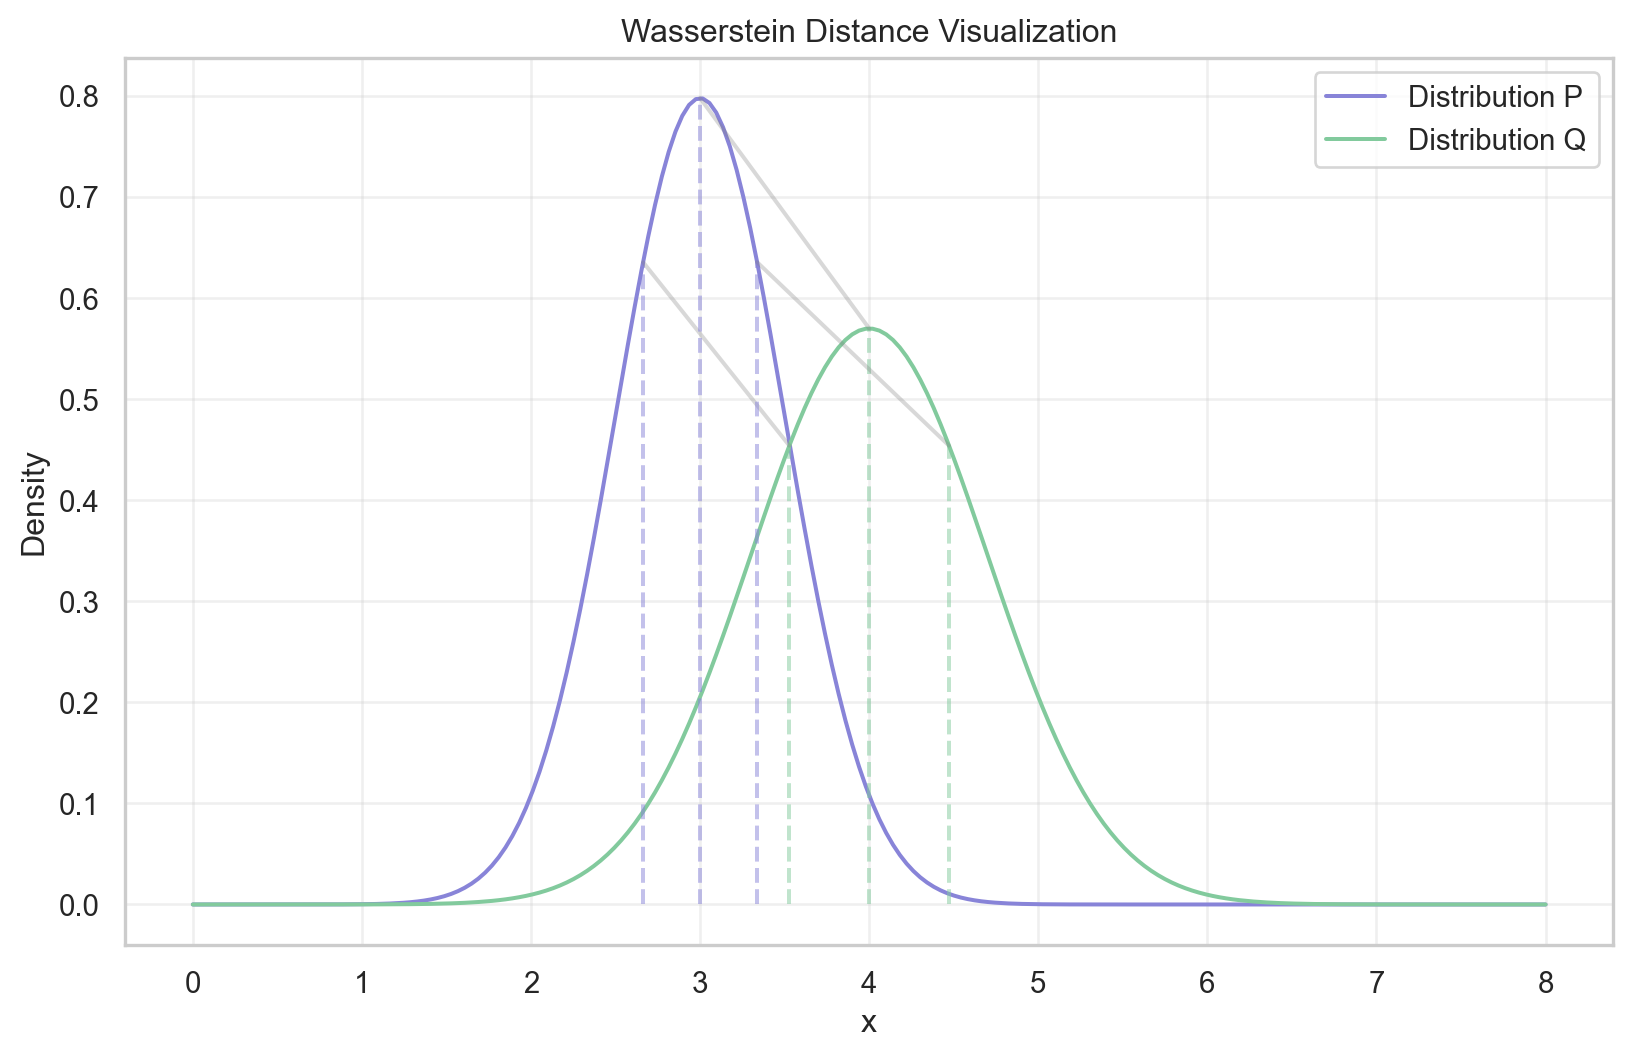

In [4]:
#| layout-ncol: 1
 
# Generate data
x = np.linspace(0, 8, 200)
dist1 = stats.norm.pdf(x, loc=3, scale=0.5)
dist2 = stats.norm.pdf(x, loc=4, scale=0.7)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(x, dist1, label='Distribution P', color='#8884d8')
plt.plot(x, dist2, label='Distribution Q', color='#82ca9d')

# Add quantile lines
quantile_points = [0.25, 0.5, 0.75]
for q in quantile_points:
    q1 = stats.norm.ppf(q, loc=3, scale=0.5)
    q2 = stats.norm.ppf(q, loc=4, scale=0.7)
    plt.vlines(q1, 0, stats.norm.pdf(q1, loc=3, scale=0.5), 
               colors='#8884d8', linestyles='--', alpha=0.5)
    plt.vlines(q2, 0, stats.norm.pdf(q2, loc=4, scale=0.7), 
               colors='#82ca9d', linestyles='--', alpha=0.5)
    plt.plot([q1, q2], 
            [stats.norm.pdf(q1, loc=3, scale=0.5), 
             stats.norm.pdf(q2, loc=4, scale=0.7)], 
            'gray', alpha=0.3)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Wasserstein Distance Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog

np.random.seed(42)

nb_b = 50

p = np.random.rand(nb_b)
p = p / p.sum()  

q = np.random.rand(nb_b)
q = q / q.sum()  

# Create the cost matrix C based on squared Euclidean distance
bins = len(p)  
C = np.square(np.subtract.outer(np.arange(bins), np.arange(bins)))  # Squared distance

# Flatten distributions and cost matrix for linear programming
c = C.flatten()  # Cost vector (flattened cost matrix)
A_eq = np.zeros((2 * bins, bins * bins))  # Equality constraints matrix
b_eq = np.concatenate([p, q])  # Marginal sums for p and q

# Build the A_eq matrix to enforce the marginals for p and q
for i in range(bins):
    A_eq[i, i * bins: (i + 1) * bins] = 1  # For row sums to p[i]
    A_eq[i + bins, i::bins] = 1  # For column sums to q[i]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, method='highs')

# Retrieve the transport plan matrix T from the solution
T = result.x.reshape((bins, bins))


def plot_density(p, q):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4))
    
    sns.kdeplot(p, color='blue', ax=ax1, linewidth=2, bw_adjust=0.3)
    ax1.set_title('p(x)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Bins', fontsize=14)
    ax1.set_ylabel('Density', fontsize=14)

    sns.kdeplot(q, color='orange', ax=ax2, linewidth=2, bw_adjust=0.3)
    ax2.set_title('q(x)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Bins', fontsize=14)
    ax2.set_ylabel('Density', fontsize=14)

    plt.tight_layout()
    plt.show()


def plot_cost_matrix(C, bins):
    plt.figure(figsize=(10, 6))
    sns.heatmap(C, annot=False, fmt='.1f', cmap=sns.color_palette("light:blue", as_cmap=True), cbar=True,
                xticklabels=[f'{i+1}' for i in range(bins)],
                yticklabels=[f'{i+1}' for i in range(bins)],
                cbar_kws={'label': 'Squared Distance'})
    plt.title('Cost Matrix: Squared Euclidean Distance', fontsize=18, fontweight='bold')
    plt.xlabel('Bins of Distribution q', fontsize=14)
    plt.ylabel('Bins of Distribution p', fontsize=14)
    plt.tight_layout()
    plt.show()


def plot_transport_plan(T, bins):
    plt.figure(figsize=(10, 6))
    sns.heatmap(T, annot=False, fmt='.2f', cmap=sns.color_palette("light:blue", as_cmap=True), cbar=True,
                xticklabels=[f'{i+1}' for i in range(bins)],
                yticklabels=[f'{i+1}' for i in range(bins)],
                cbar_kws={'label': 'Transport Amount'})
    plt.title("Optimal Transport Plan", fontsize=18, fontweight='bold')
    plt.xlabel("Bins of Distribution q", fontsize=14)
    plt.ylabel("Bins of Distribution p", fontsize=14)
    plt.tight_layout()
    plt.show()

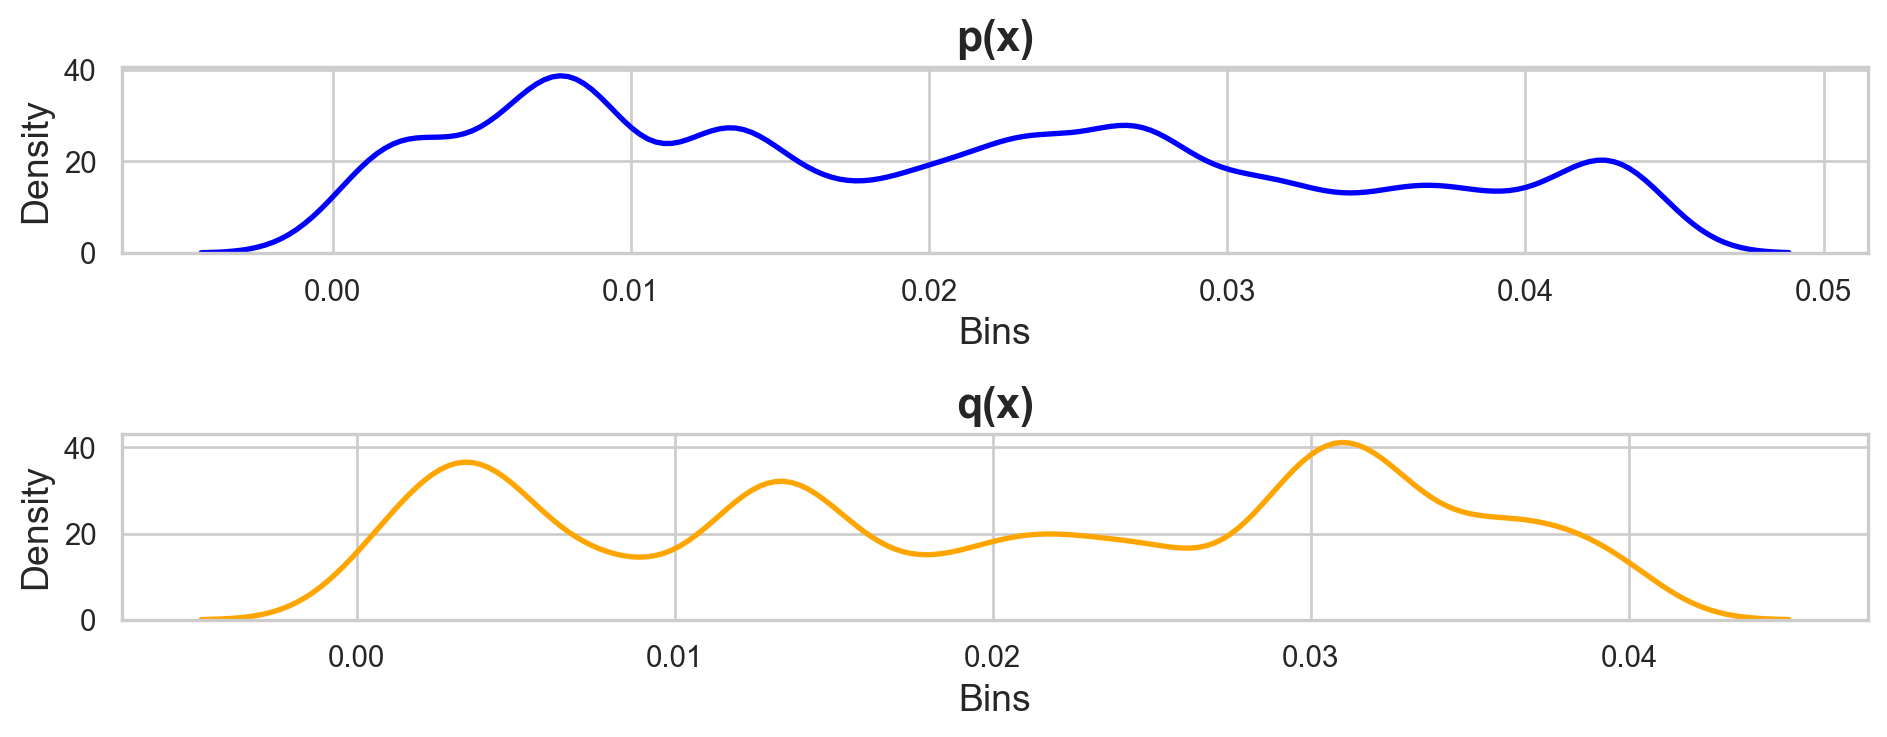

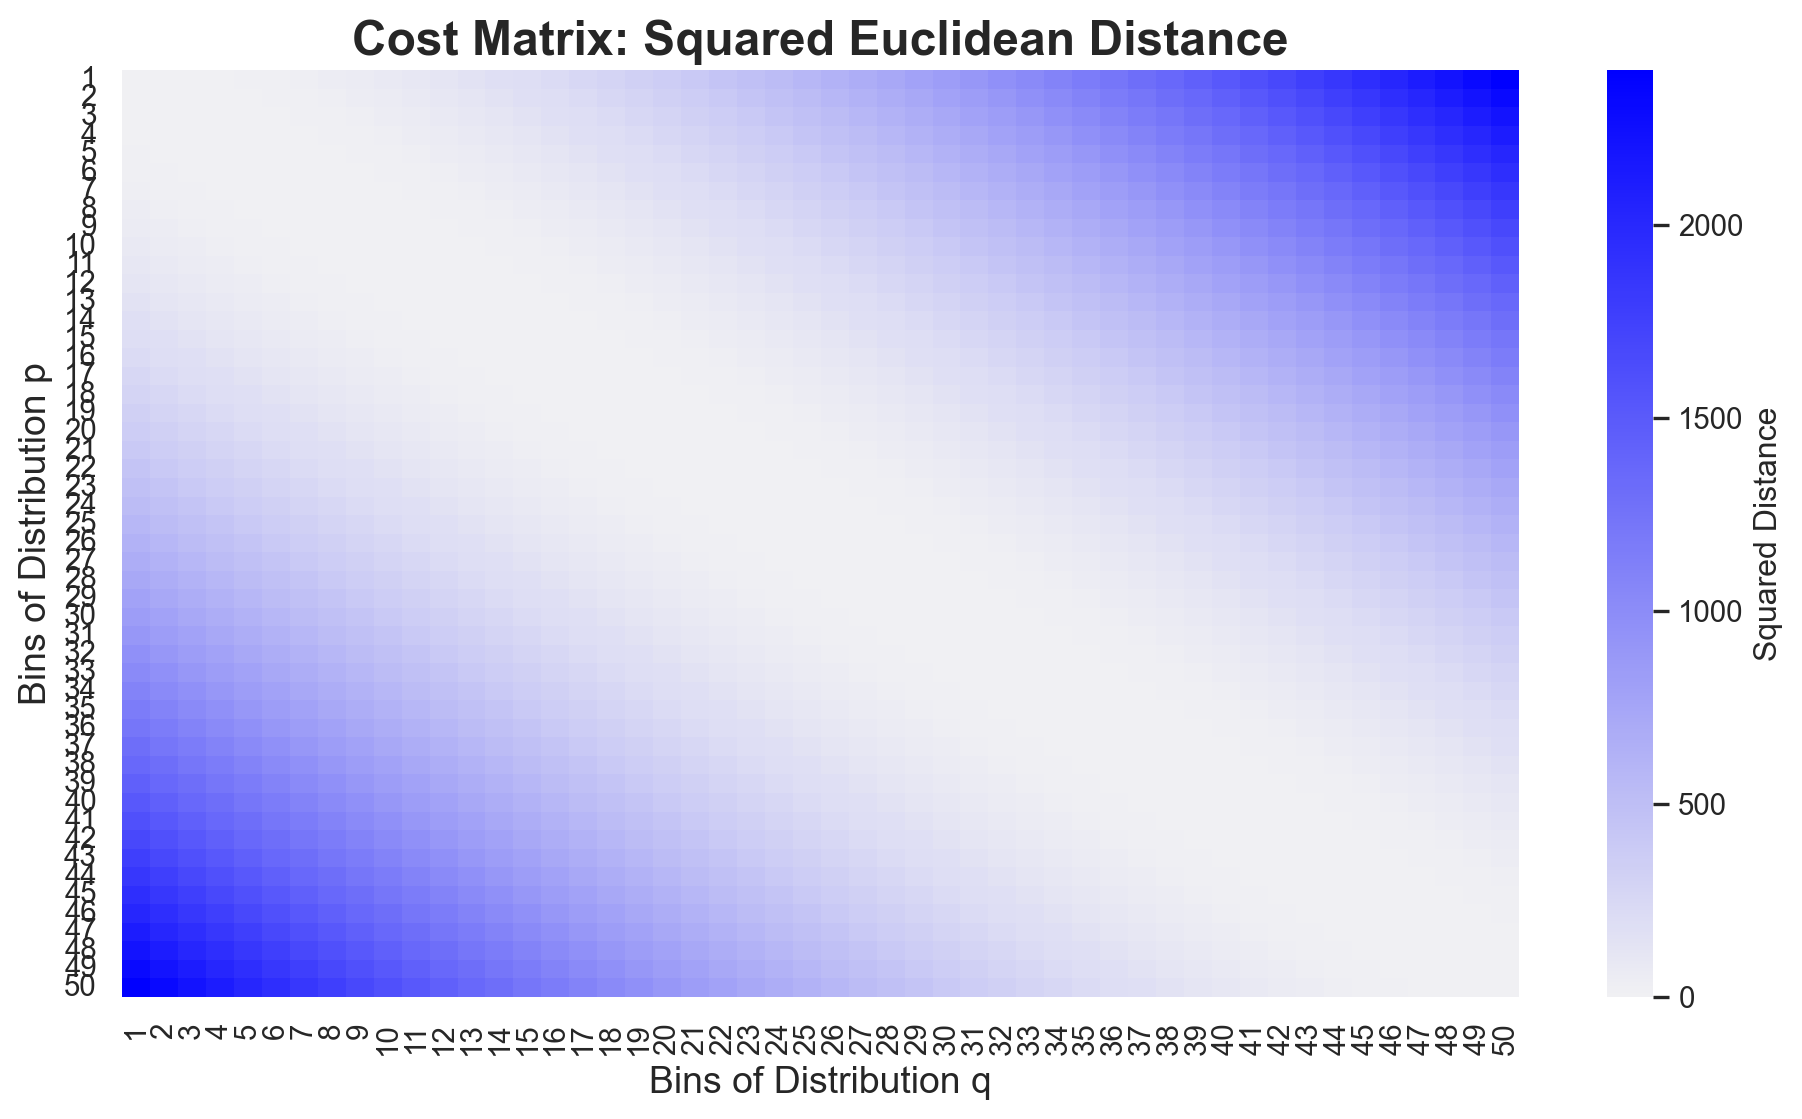

In [6]:
#| layout-ncol: 2
plot_density(p, q)

plot_cost_matrix(C, bins)

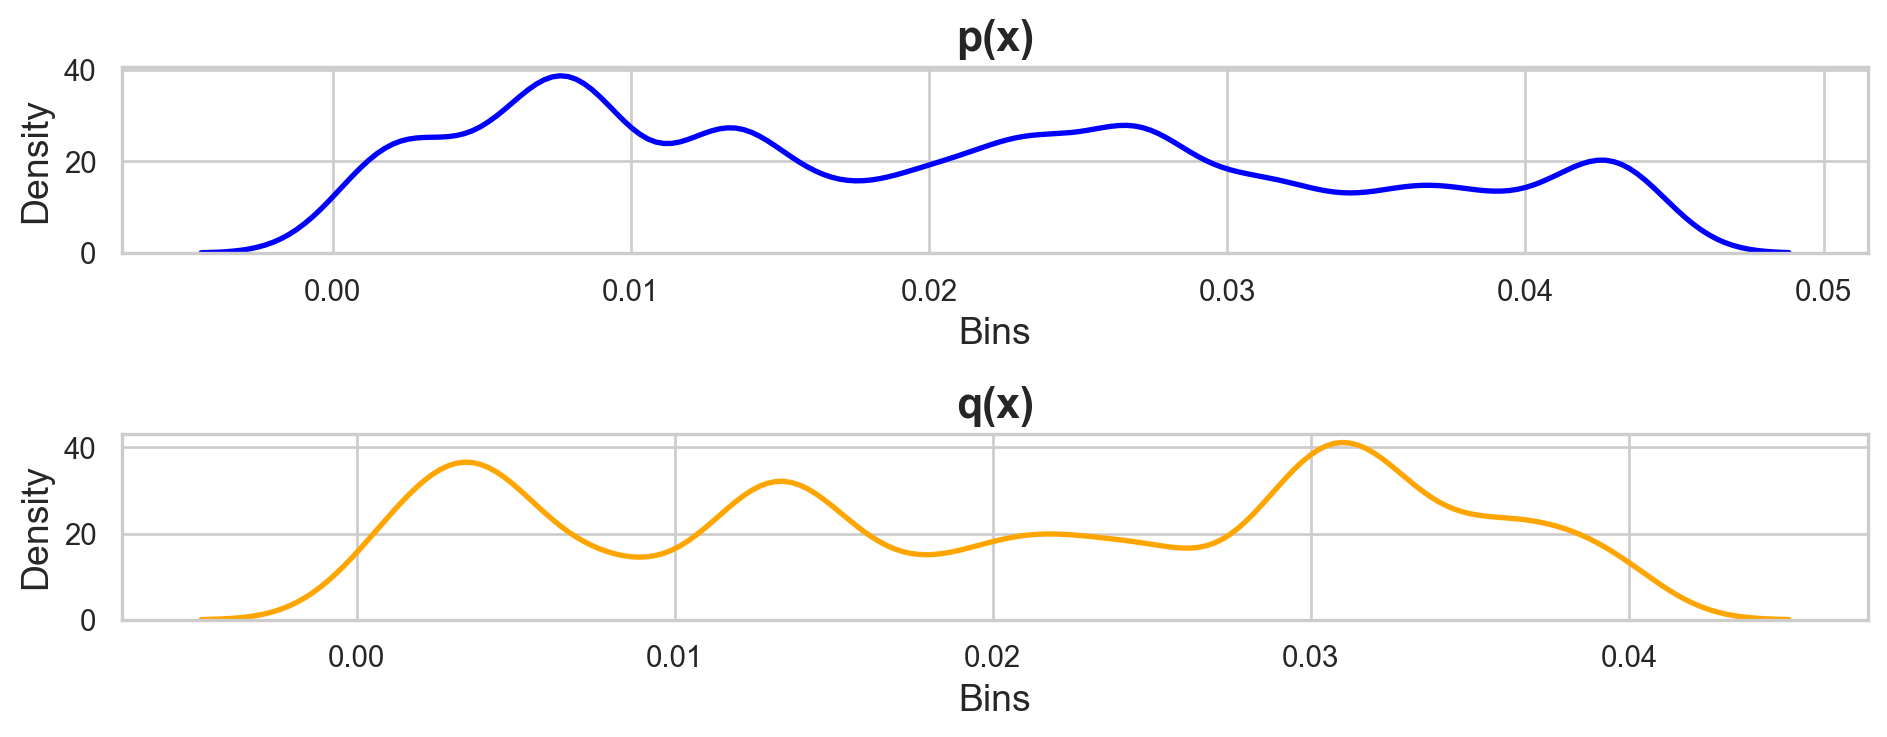

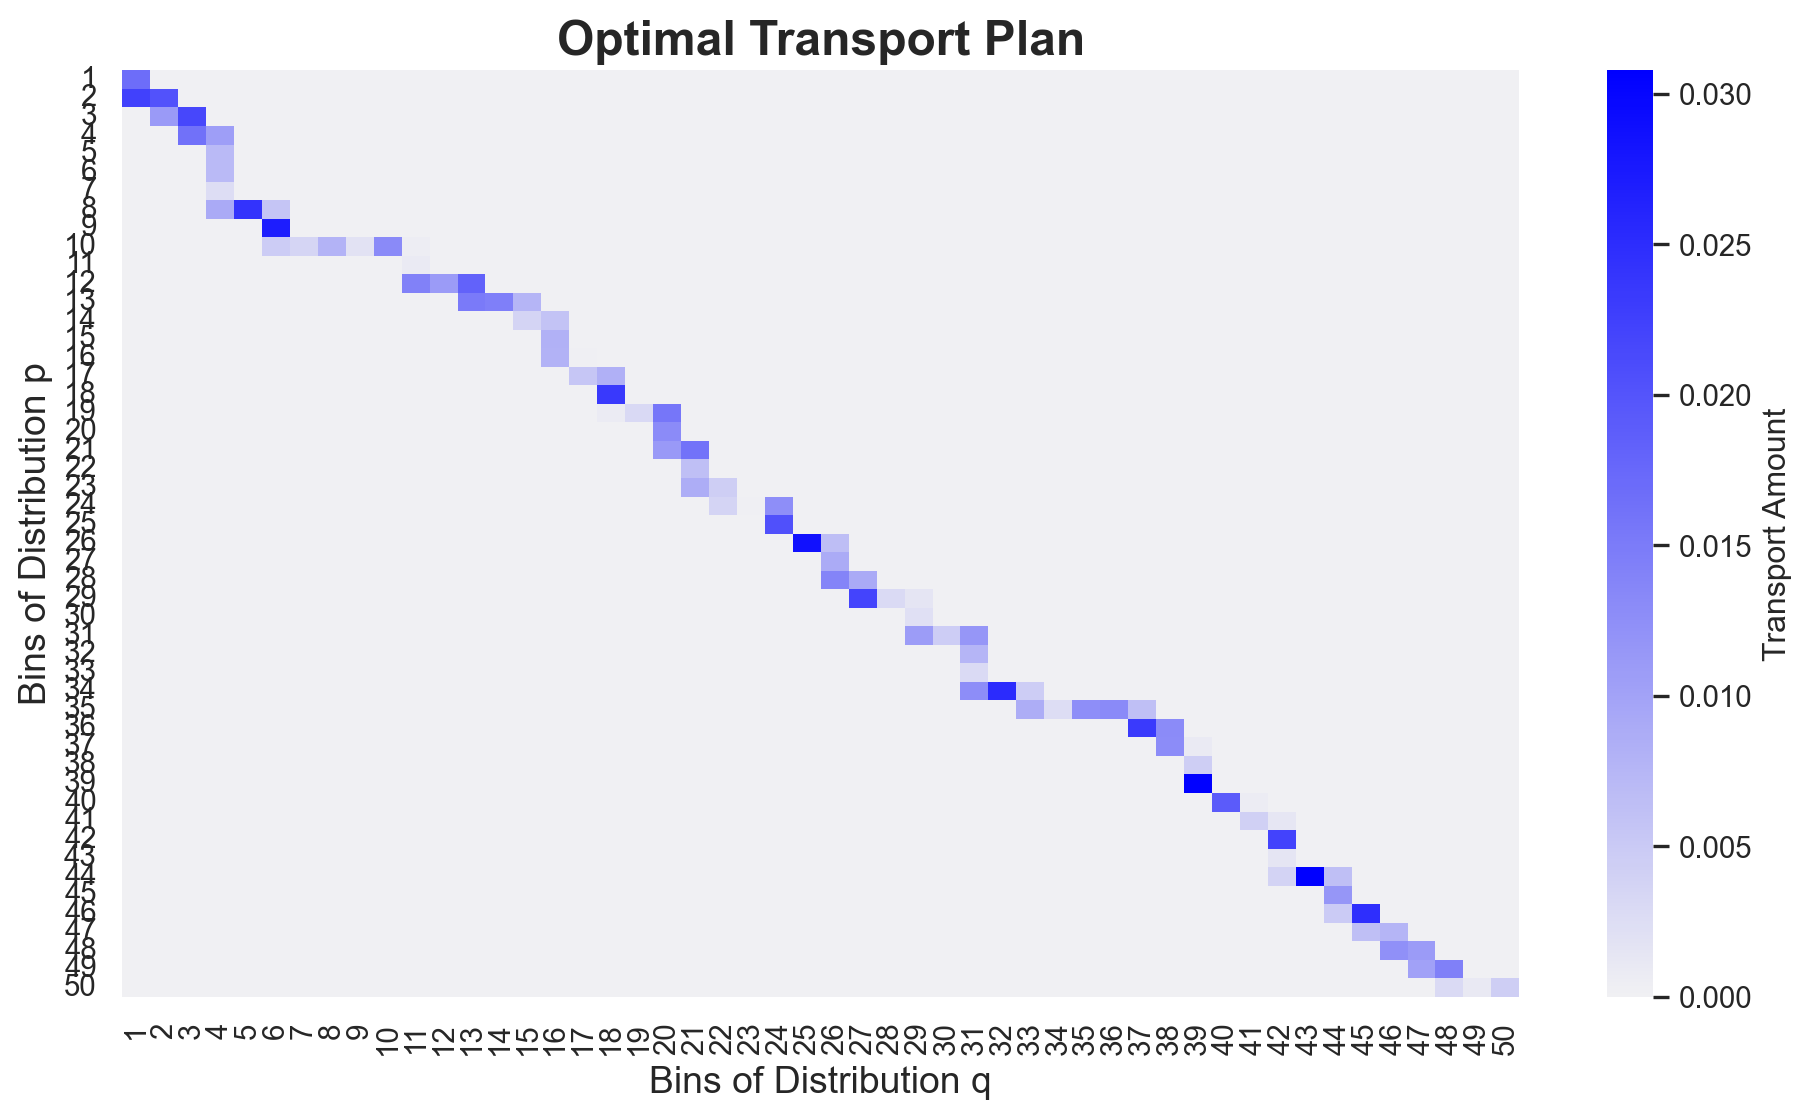

In [7]:
#| label: fig-transport
#| fig-cap:
#|   - 'Density plots of the two distributions p and q '
#|   - Optimal transport plan showing the transport amounts between bins of p and q.
#| layout-ncol: 2

plot_density(p, q)

plot_transport_plan(T, bins)